In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import glob
import os
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.structures import BoxMode

from detectron2.engine import DefaultTrainer

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
def get_ead_dicts(img_dir):    
    images_path = os.path.join(img_dir, '*.jpg')
    images = glob.glob(images_path)
    
    dataset_dicts = []
    
    for idx, image_path in enumerate(images):
        text_path= image_path.replace(".jpg", ".txt")
        
        record = {}

        height, width = cv2.imread(image_path).shape[:2]
        
        record["file_name"] = image_path
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width        
        
        with open(text_path) as f:
            contents = f.readlines()
        
        objs = []
        for content in contents:
            information = content.split(' ')
            
            obj = {
                "bbox": [(float(information[1]) - float(information[3]) / 2)*width, 
                         (float(information[2]) - float(information[4]) / 2)*height, 
                         (float(information[1]) + float(information[3]) / 2)*width, 
                         (float(information[2]) + float(information[4]) / 2)*height],
                "bbox_mode": BoxMode.XYXY_ABS,
                "category_id": int(information[0])
            }
            objs.append(obj)
                        
        record["annotations"] = objs
        dataset_dicts.append(record)                        
    return dataset_dicts

from detectron2.data import DatasetCatalog, MetadataCatalog

data_path = r'/home/ws2080/Desktop/codes/models/research/ead/data/'
train_path = r'/home/ws2080/Desktop/data/training/train/'
validation_path = r'/home/ws2080/Desktop/data/training/validation/'

'''
d= 'train'
DatasetCatalog.register("ead_train_1", lambda d=d: get_ead_dicts(train_path))
MetadataCatalog.get("ead_train_1").set(thing_classes=["specularity", "saturation", "artifact", "blur", "contrast", "bubbles", "instrument", "blood"])

'''

d= 'validation'
DatasetCatalog.register("ead_validation_1", lambda d=d: get_ead_dicts(validation_path))
MetadataCatalog.get("ead_validation_1").set(thing_classes=["specularity", "saturation", "artifact", "blur", "contrast", "bubbles", "instrument", "blood"])

Metadata(name='ead_validation_1', thing_classes=['specularity', 'saturation', 'artifact', 'blur', 'contrast', 'bubbles', 'instrument', 'blood'])

In [3]:
model_path = 'output_24'

In [4]:
checkpoints = ['0009999',
               '0019999',
               '0029999',
               '0039999',
               '0049999',
               '0059999',
               '0069999',    
               '0079999',
               '0089999',    
               '0099999', 
               '0109999', 
               '0119999', 
               '0129999',
               '0139999',
               '0149999',
               '0159999',
               '0169999',
               '0179999',
               '0189999',
               '0199999']

checkpoints = ['0199999',
               '0209999',
               '0219999',
               '0229999',
               '0239999',
               '0249999',
               '0259999',
               '0269999',
               '0279999']

In [5]:
APs =[]
AP50s = []
AP75s = []

In [6]:
for checkpoint in checkpoints:
    print('--------------------------------------- ',checkpoint,' ---------------------------------------------')
    cfg = get_cfg()

    cfg.merge_from_file(model_path+"/config.yaml")
    model = build_model(cfg)
    DetectionCheckpointer(model).load(model_path+"/model_"+checkpoint+".pth")
    
    evaluator = COCOEvaluator("ead_validation_1", cfg, False, output_dir=model_path+"/")
    val_loader = build_detection_test_loader(cfg, "ead_validation_1")
    a = inference_on_dataset(model, val_loader, evaluator)
    
    APs.append(a.get('bbox')['AP'])
    AP50s.append(a.get('bbox')['AP50'])
    AP75s.append(a.get('bbox')['AP75'])

---------------------------------------  0009999  ---------------------------------------------
WARNING [02/29 11:21:15 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'ead_validation_1'
[02/29 11:21:15 d2.data.datasets.coco]: Cached annotations in COCO format already exist: output_24/ead_validation_1_coco_format.json
[02/29 11:21:16 d2.data.build]: Distribution of instances among all 8 categories:
|  category   | #instances   |  category  | #instances   |  category  | #instances   |
|:-----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| specularity | 1399         | saturation | 173          |  artifact  | 969          |
|    blur     | 96           |  contrast  | 224          |  bubbles   | 622          |
| instrument  | 62           |   blood    | 53           |            |              |
|    total    | 3598         |            |              |            |              |
[02/29 11:21:16 d2.evaluation.evaluator]: Sta

[02/29 11:22:19 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category    | AP     | category   | AP     | category   | AP     |
|:------------|:-------|:-----------|:-------|:-----------|:-------|
| specularity | 9.304  | saturation | 26.559 | artifact   | 19.324 |
| blur        | 33.779 | contrast   | 37.658 | bubbles    | 10.010 |
| instrument  | 59.750 | blood      | 9.560  |            |        |
---------------------------------------  0039999  ---------------------------------------------
[02/29 11:22:24 d2.evaluation.evaluator]: Start inference on 300 images
[02/29 11:22:25 d2.evaluation.evaluator]: Inference done 11/300. 0.0411 s / img. ETA=0:00:12
[02/29 11:22:30 d2.evaluation.evaluator]: Inference done 133/300. 0.0399 s / img. ETA=0:00:06
[02/29 11:22:35 d2.evaluation.evaluator]: Inference done 255/300. 0.0398 s / img. ETA=0:00:01
[02/29 11:22:37 d2.evaluation.evaluator]: Total inference time: 0:00:12.239542 (0.041490 s / img per device, on 1 devices)
[02/29 11:22

[02/29 11:23:26 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category    | AP     | category   | AP     | category   | AP     |
|:------------|:-------|:-----------|:-------|:-----------|:-------|
| specularity | 8.958  | saturation | 21.696 | artifact   | 17.658 |
| blur        | 33.198 | contrast   | 37.229 | bubbles    | 9.076  |
| instrument  | 62.492 | blood      | 8.545  |            |        |
---------------------------------------  0069999  ---------------------------------------------
[02/29 11:23:29 d2.evaluation.evaluator]: Start inference on 300 images
[02/29 11:23:29 d2.evaluation.evaluator]: Inference done 11/300. 0.0397 s / img. ETA=0:00:11
[02/29 11:23:34 d2.evaluation.evaluator]: Inference done 136/300. 0.0392 s / img. ETA=0:00:06
[02/29 11:23:39 d2.evaluation.evaluator]: Inference done 261/300. 0.0391 s / img. ETA=0:00:01
[02/29 11:23:41 d2.evaluation.evaluator]: Total inference time: 0:00:11.907535 (0.040365 s / img per device, on 1 devices)
[02/29 11:23

[02/29 11:24:28 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category    | AP     | category   | AP     | category   | AP     |
|:------------|:-------|:-----------|:-------|:-----------|:-------|
| specularity | 10.018 | saturation | 24.042 | artifact   | 16.673 |
| blur        | 35.360 | contrast   | 34.771 | bubbles    | 8.069  |
| instrument  | 67.468 | blood      | 11.264 |            |        |
---------------------------------------  0099999  ---------------------------------------------
[02/29 11:24:31 d2.evaluation.evaluator]: Start inference on 300 images
[02/29 11:24:31 d2.evaluation.evaluator]: Inference done 11/300. 0.0398 s / img. ETA=0:00:11
[02/29 11:24:36 d2.evaluation.evaluator]: Inference done 134/300. 0.0397 s / img. ETA=0:00:06
[02/29 11:24:41 d2.evaluation.evaluator]: Inference done 257/300. 0.0397 s / img. ETA=0:00:01
[02/29 11:24:43 d2.evaluation.evaluator]: Total inference time: 0:00:12.093205 (0.040994 s / img per device, on 1 devices)
[02/29 11:24

[02/29 11:25:29 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category    | AP     | category   | AP     | category   | AP     |
|:------------|:-------|:-----------|:-------|:-----------|:-------|
| specularity | 9.561  | saturation | 22.401 | artifact   | 16.639 |
| blur        | 31.077 | contrast   | 34.547 | bubbles    | 9.886  |
| instrument  | 63.497 | blood      | 8.887  |            |        |
---------------------------------------  0129999  ---------------------------------------------
[02/29 11:25:33 d2.evaluation.evaluator]: Start inference on 300 images
[02/29 11:25:34 d2.evaluation.evaluator]: Inference done 11/300. 0.0398 s / img. ETA=0:00:11
[02/29 11:25:39 d2.evaluation.evaluator]: Inference done 134/300. 0.0397 s / img. ETA=0:00:06
[02/29 11:25:44 d2.evaluation.evaluator]: Inference done 258/300. 0.0396 s / img. ETA=0:00:01
[02/29 11:25:45 d2.evaluation.evaluator]: Total inference time: 0:00:12.081883 (0.040956 s / img per device, on 1 devices)
[02/29 11:25

[02/29 11:26:32 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category    | AP     | category   | AP     | category   | AP     |
|:------------|:-------|:-----------|:-------|:-----------|:-------|
| specularity | 7.882  | saturation | 21.700 | artifact   | 15.700 |
| blur        | 26.602 | contrast   | 33.388 | bubbles    | 8.650  |
| instrument  | 60.866 | blood      | 11.209 |            |        |
---------------------------------------  0159999  ---------------------------------------------
[02/29 11:26:34 d2.evaluation.evaluator]: Start inference on 300 images
[02/29 11:26:34 d2.evaluation.evaluator]: Inference done 11/300. 0.0404 s / img. ETA=0:00:11
[02/29 11:26:39 d2.evaluation.evaluator]: Inference done 131/300. 0.0406 s / img. ETA=0:00:07
[02/29 11:26:45 d2.evaluation.evaluator]: Inference done 251/300. 0.0406 s / img. ETA=0:00:02
[02/29 11:26:47 d2.evaluation.evaluator]: Total inference time: 0:00:12.365343 (0.041916 s / img per device, on 1 devices)
[02/29 11:26

[02/29 11:27:34 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category    | AP     | category   | AP     | category   | AP     |
|:------------|:-------|:-----------|:-------|:-----------|:-------|
| specularity | 9.080  | saturation | 21.802 | artifact   | 14.918 |
| blur        | 30.895 | contrast   | 35.654 | bubbles    | 8.380  |
| instrument  | 65.923 | blood      | 14.347 |            |        |
---------------------------------------  0189999  ---------------------------------------------
[02/29 11:27:40 d2.evaluation.evaluator]: Start inference on 300 images
[02/29 11:27:41 d2.evaluation.evaluator]: Inference done 11/300. 0.0405 s / img. ETA=0:00:11
[02/29 11:27:46 d2.evaluation.evaluator]: Inference done 131/300. 0.0407 s / img. ETA=0:00:07
[02/29 11:27:51 d2.evaluation.evaluator]: Inference done 252/300. 0.0406 s / img. ETA=0:00:01
[02/29 11:27:53 d2.evaluation.evaluator]: Total inference time: 0:00:12.323619 (0.041775 s / img per device, on 1 devices)
[02/29 11:27

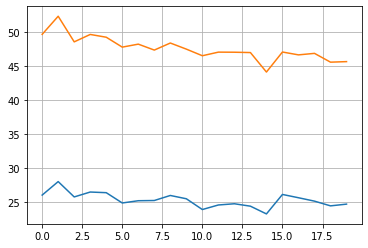

In [7]:
plt.grid(True)
plt.plot(APs)
plt.plot(AP50s)
#plt.plot(AP75s)

In [8]:
APs

[26.014840946635104,
 27.9962662038547,
 25.742913306294675,
 26.463505744975695,
 26.36726688735115,
 24.85641386469105,
 25.186475631613636,
 25.219023819256254,
 25.958180342926024,
 25.474800258994705,
 23.893148150644624,
 24.56193821678421,
 24.740479071086096,
 24.386325381502434,
 23.249737939740758,
 26.10755237670308,
 25.624809996134147,
 25.124999119651097,
 24.432128864140584,
 24.687763523010247]

In [9]:
AP50s

[49.61605985507955,
 52.27411230941995,
 48.51260425031824,
 49.60143890327377,
 49.1937416724068,
 47.73985508673212,
 48.177800641075926,
 47.306762730126195,
 48.34238489011745,
 47.44661171570567,
 46.47496432196306,
 47.00471805562556,
 46.99128809562612,
 46.94205046329055,
 44.08161671623587,
 47.02145382847136,
 46.6022795749631,
 46.82246722997513,
 45.53098215527245,
 45.611401872645004]